In [124]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import to_categorical 
from tensorflow.keras.utils import plot_model

In [125]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [126]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [127]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [128]:
y_train.shape

(50000, 1)

In [129]:
y_train[0]

array([6], dtype=uint8)

In [130]:
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

In [131]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [132]:
labels_train = y_train.reshape(-1,)
labels_test = y_test.reshape(-1,)

In [133]:
y_classes = {
0: "airplane", 
1: "automobile", 
2: "bird", 
3: "cat", 
4: "deer", 
5: "dog", 
6: "frog", 
7: "horse", 
8: "ship", 
9: "truck"}

## Observe the dataset 

In [134]:
def show_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[list(y[index]).index(1)])

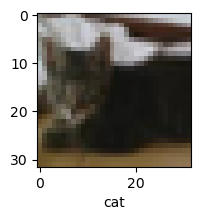

In [135]:
show_image(X_train,y_train,9)

## Normalize the dataset 

In [136]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

## Build the model 

In [150]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=10, activation="softmax"))

In [151]:
plot_model(
    model,
    show_shapes=True,
    expand_nested=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile the model 

In [152]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_28 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 64)       

In [154]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 53s 67ms/step - loss: 1.5677 - accuracy: 0.4660 - val_loss: 1.3427 - val_accuracy: 0.5330
Epoch 2/25
782/782 [==============================] - 58s 75ms/step - loss: 1.1231 - accuracy: 0.6026 - val_loss: 1.3764 - val_accuracy: 0.5310
Epoch 3/25
782/782 [==============================] - 61s 78ms/step - loss: 0.9567 - accuracy: 0.6639 - val_loss: 1.5122 - val_accuracy: 0.5168
Epoch 4/25
782/782 [==============================] - 64s 82ms/step - loss: 0.8473 - accuracy: 0.7006 - val_loss: 1.0818 - val_accuracy: 0.6329
Epoch 5/25
782/782 [==============================] - 66s 84ms/step - loss: 0.7742 - accuracy: 0.7278 - val_loss: 0.8021 - val_accuracy: 0.7215
Epoch 6/25
782/782 [==============================] - 61s 78ms/step - loss: 0.7226 - accuracy: 0.7452 - val_loss: 0.8766 - val_accuracy: 0.7037
Epoch 7/25
782/782 [==============================] - 61s 79ms/step - loss: 0.6725 - accuracy: 0.7638 - val_loss: 0.7497 - val_accuracy:

In [148]:
scores = model.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.74%


In [115]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.7748 - accuracy: 0.7314
Loss:  0.7747704982757568
Accuracy:  0.7314000129699707


In [157]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')

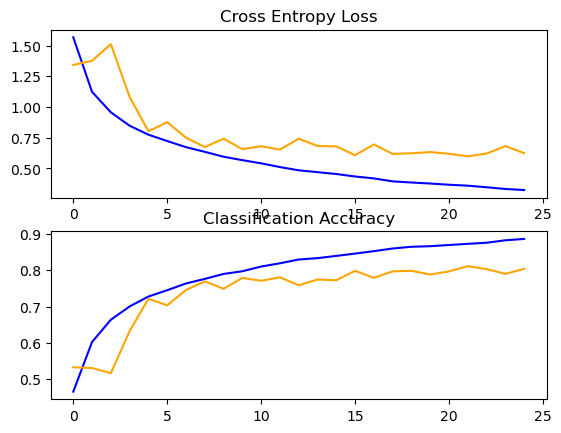

In [158]:
summarize_diagnostics(history)

## Transfer Learning for Object Detection

In [175]:
from tensorflow.keras.applications import VGG16

### Load Pretrained CNN Model

In [187]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

### Freeze lower convolution layers

In [188]:
for layer in base_model.layers:
    layer.trainable = False

###  Add custom classifier

In [189]:
model_transfer = Sequential()
model_transfer.add(base_model)
model_transfer.add(Flatten())
model_transfer.add(Dense(512, activation='relu'))
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(256, activation='relu'))
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(10, activation='softmax'))

In [190]:
model_transfer.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [191]:
model_transfer.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 512)               262656    
                                                                 
 dropout_52 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dropout_53 (Dropout)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 10)              

In [193]:
history_transfer = model_transfer.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=11, batch_size=64)

Epoch 1/11
782/782 [==============================] - 362s 462ms/step - loss: 1.4035 - accuracy: 0.5026 - val_loss: 1.2363 - val_accuracy: 0.5634
Epoch 2/11
782/782 [==============================] - 373s 478ms/step - loss: 1.2065 - accuracy: 0.5775 - val_loss: 1.1587 - val_accuracy: 0.5917
Epoch 3/11
782/782 [==============================] - 436s 557ms/step - loss: 1.1388 - accuracy: 0.6003 - val_loss: 1.1409 - val_accuracy: 0.5973
Epoch 4/11
782/782 [==============================] - 447s 572ms/step - loss: 1.0898 - accuracy: 0.6181 - val_loss: 1.1204 - val_accuracy: 0.6081
Epoch 5/11
782/782 [==============================] - 445s 570ms/step - loss: 1.0497 - accuracy: 0.6296 - val_loss: 1.1116 - val_accuracy: 0.6066
Epoch 6/11
782/782 [==============================] - 434s 555ms/step - loss: 1.0131 - accuracy: 0.6429 - val_loss: 1.1038 - val_accuracy: 0.6142
Epoch 7/11
782/782 [==============================] - 433s 554ms/step - loss: 0.9809 - accuracy: 0.6536 - val_loss: 1.0886 -

In [194]:
score_transfer = model_transfer.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (score_transfer[1]*100))

Accuracy: 61.84%


In [186]:
test_loss1, test_acc1 = model_transfer.evaluate(X_test, y_test)
print("Loss: ", test_loss1)
print("Accuracy: ", test_acc1)

313/313 [==============================] - 48s 152ms/step - loss: 2.3799 - accuracy: 0.0842
Loss:  2.3799450397491455
Accuracy:  0.08420000225305557
